<a href="https://colab.research.google.com/github/1995anas/Chicago-Crime-Data/blob/main/Chicago_Crime_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chicago Crime Data

- Author : Anas Abu Alhaija

### We should answer a series of questions about trends in crimes in Chicago for a reporter for the local newspaper

### Source of data : [link](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data)

Mount

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import

In [23]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
pd.set_option('display.max_columns',50)

Load and Preview the Data

In [3]:
fpath = '/content/drive/MyDrive/CodingDojo/04-DataViz/Week16/Data/Crimes_-_2001_to_Present.csv'
df = pd.read_csv(fpath)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7946092 entries, 0 to 7946091
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   ID                    int64  
 2   Case Number           object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

,Date,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2015-03-18 12:00:00,11037294,JA371270,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,1.0,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,2018-12-20 15:00:00,11646293,JC213749,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,25.0,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,2016-05-01 00:25:00,11645836,JC212333,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,2018-12-20 16:00:00,11645959,JC211511,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,2014-06-01 00:01:00,11645601,JC212935,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,22.0,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7946087,2020-08-10 20:30:00,12131776,JD327752,066XX S SACRAMENTO AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,831,8.0,17.0,66.0,05,1157527.0,1860392.0,2020,08/17/2020 03:41:32 PM,41.772671,-87.698104,"(41.772671069, -87.698104059)"
7946088,2020-06-18 21:00:00,12082414,JD269218,093XX S DR MARTIN LUTHER KING JR DR,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,633,6.0,9.0,49.0,06,1180558.0,1843036.0,2020,06/25/2020 03:41:40 PM,41.724546,-87.614211,"(41.724546436, -87.614210743)"
7946089,2020-07-27 15:02:00,12118237,JD311791,033XX W POLK ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1134,11.0,24.0,27.0,08B,1154169.0,1896171.0,2020,08/03/2020 03:41:51 PM,41.870921,-87.709461,"(41.870920735, -87.709461362)"
7946090,2020-08-14 15:00:00,12142591,JD340297,023XX W ROSEMONT AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,2413,24.0,50.0,2.0,07,1159419.0,1941765.0,2020,08/26/2020 03:40:41 PM,41.995927,-87.688929,"(41.995927389, -87.688928533)"


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df = df.set_index('Date')

In [6]:
df.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-18 12:00:00,11037294,JA371270,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,1.0,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
2018-12-20 15:00:00,11646293,JC213749,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,25.0,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2016-05-01 00:25:00,11645836,JC212333,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2018-12-20 16:00:00,11645959,JC211511,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2014-06-01 00:01:00,11645601,JC212935,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,22.0,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7946092 entries, 2015-03-18 12:00:00 to 2020-03-06 14:00:00
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Block                 object 
 3   IUCR                  object 
 4   Primary Type          object 
 5   Description           object 
 6   Location Description  object 
 7   Arrest                bool   
 8   Domestic              bool   
 9   Beat                  int64  
 10  District              float64
 11  Ward                  float64
 12  Community Area        float64
 13  FBI Code              object 
 14  X Coordinate          float64
 15  Y Coordinate          float64
 16  Year                  int64  
 17  Updated On            object 
 18  Latitude              float64
 19  Longitude             float64
 20  Location              object 
dtypes: bool(2), float64(7), int64(3), object(9)


## Stakeholder Questions

1. Comparing Police Districts
- Which district had the most crimes in 2022?
- Which had the least?

In [8]:
police_districts = df.loc['2022','District' ].value_counts()
police_districts

8.0     14809
6.0     14711
12.0    14354
4.0     13948
11.0    13473
1.0     13061
18.0    12447
19.0    12263
25.0    11958
3.0     11935
2.0     11800
9.0     10375
7.0     10322
10.0     9970
5.0      9784
16.0     9242
24.0     8474
15.0     8310
14.0     8165
22.0     7674
17.0     6997
20.0     4967
31.0       14
Name: District, dtype: int64

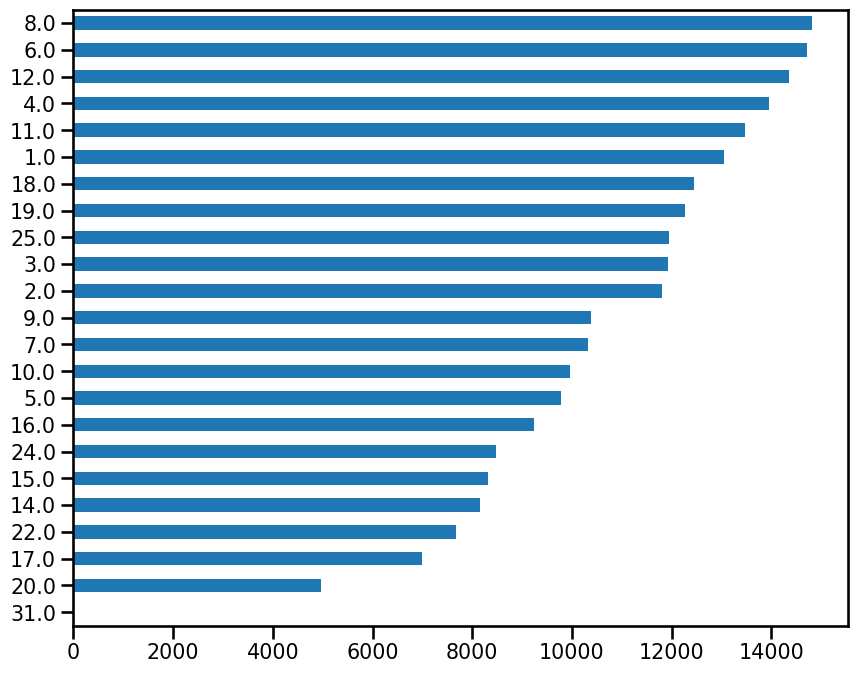

In [24]:
police_districts.value_counts(normalize=True)
police_districts.sort_values().plot(kind='barh',figsize=(10,8));

The  **8** district had the most crimes in 2022

The **31** district had the least crimes in 2022

2. Crimes Across the Years

- Is the total number of crimes increasing or decreasing across the years?

- Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

In [10]:
df['Year']  = df.index.year

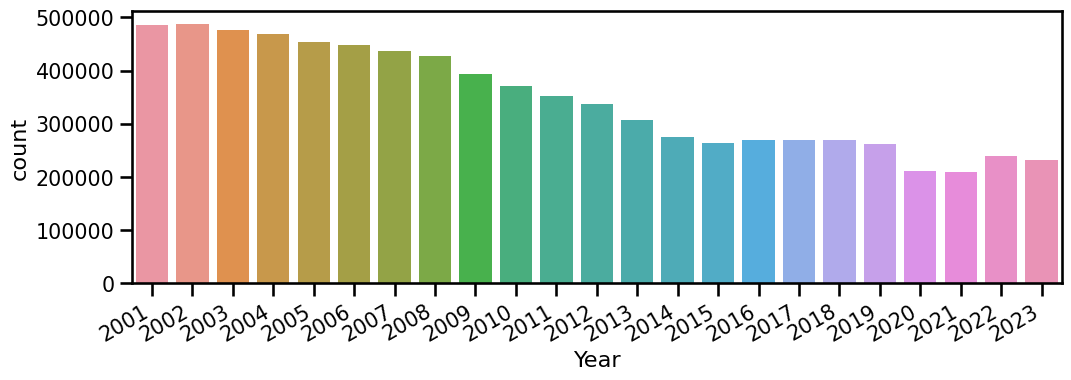

In [25]:
ax = sns.countplot(data=df, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate()

Number of Crimes is decreasing across the years

In [12]:
df['Primary Type'].unique()

array(['DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'THEFT', 'BATTERY',
       'ASSAULT', 'WEAPONS VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'SEX OFFENSE', 'BURGLARY', 'NARCOTICS', 'LIQUOR LAW VIOLATION',
       'CRIM SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT', 'CRIMINAL DAMAGE',
       'OFFENSE INVOLVING CHILDREN', 'CRIMINAL TRESPASS', 'ROBBERY',
       'PUBLIC PEACE VIOLATION', 'CRIMINAL SEXUAL ASSAULT',
       'PROSTITUTION', 'STALKING', 'HOMICIDE', 'KIDNAPPING', 'ARSON',
       'CONCEALED CARRY LICENSE VIOLATION', 'GAMBLING', 'OBSCENITY',
       'INTIMIDATION', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY',
       'NON-CRIMINAL', 'HUMAN TRAFFICKING', 'RITUALISM',
       'DOMESTIC VIOLENCE', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'NON - CRIMINAL'], dtype=object)

In [13]:
crimes_by_year = df.groupby("Year")['Primary Type'].value_counts(normalize=False)
crimes_by_year

Year  Primary Type            
2001  THEFT                       99279
      BATTERY                     93463
      CRIMINAL DAMAGE             55861
      NARCOTICS                   50567
      ASSAULT                     31384
                                  ...  
2023  GAMBLING                       14
      HUMAN TRAFFICKING               9
      PUBLIC INDECENCY                4
      NON-CRIMINAL                    3
      OTHER NARCOTIC VIOLATION        2
Name: Primary Type, Length: 720, dtype: int64

In [14]:
## convert to dataframe and reset_index()
plot_df = crimes_by_year.to_frame('# of Crimes').reset_index()
plot_df

,Year,Primary Type,# of Crimes
0,2001,THEFT,99279
1,2001,BATTERY,93463
2,2001,CRIMINAL DAMAGE,55861
3,2001,NARCOTICS,50567
4,2001,ASSAULT,31384
...,...,...,...
715,2023,GAMBLING,14
716,2023,HUMAN TRAFFICKING,9
717,2023,PUBLIC INDECENCY,4
718,2023,NON-CRIMINAL,3


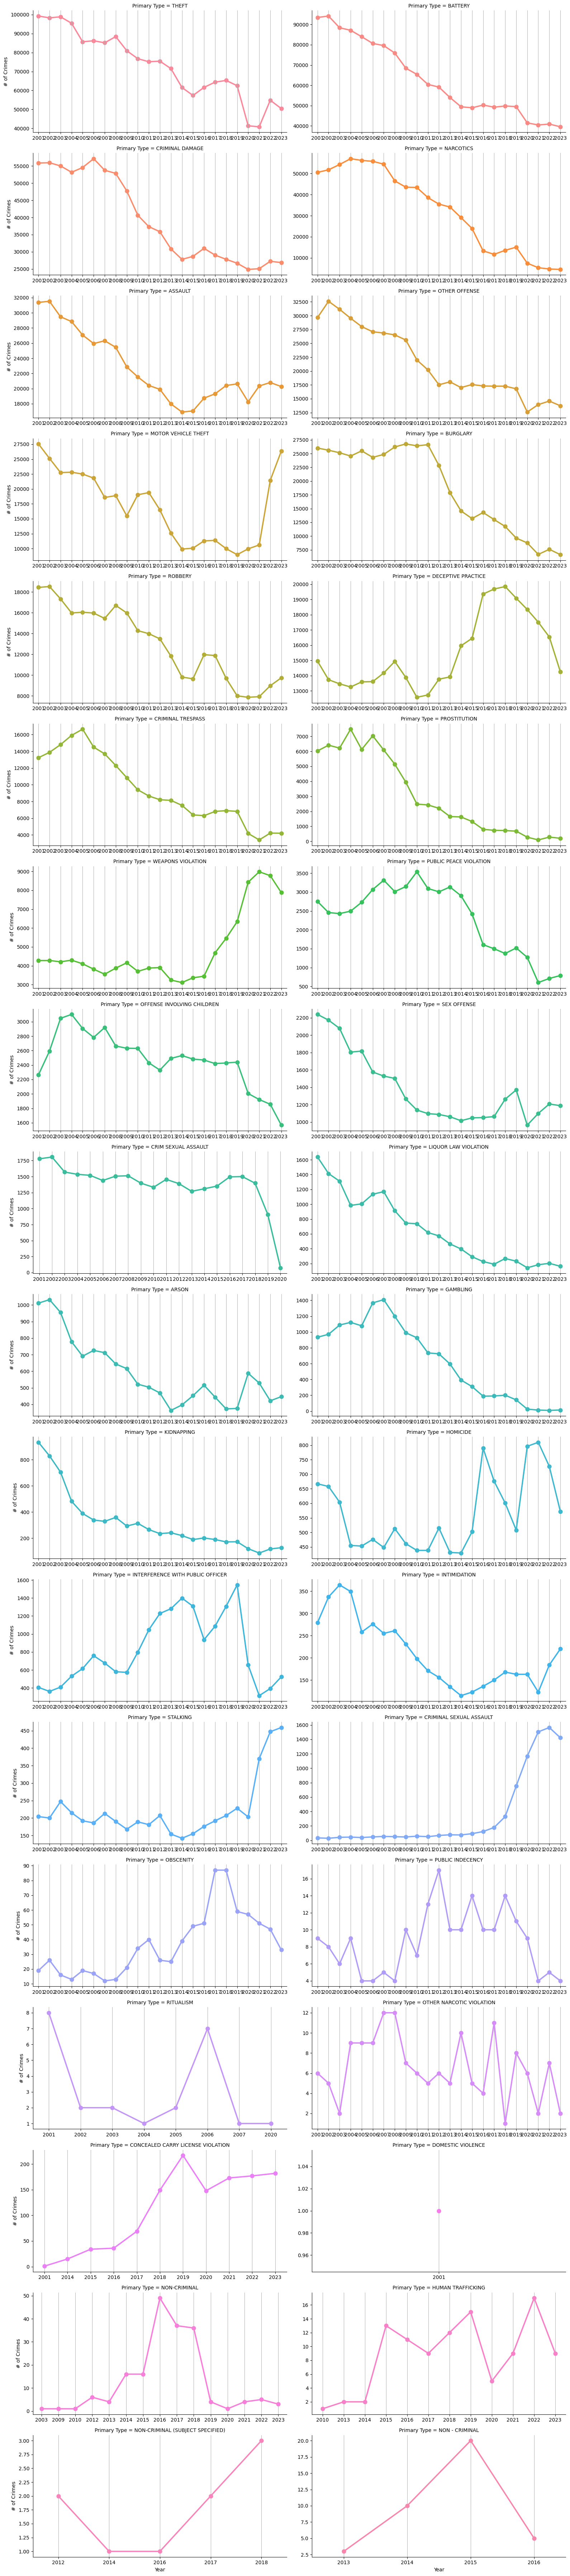

In [15]:
g  = sns.catplot(data=plot_df, x='Year', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

There are some individual crimes that are incresing across years like
INTERFERENCE WITH PUBLIC OFFICER, CRIMINAL SEXUAL ASSAULT and CONCEALED CARRY LICENSE VIOLATION

3. Comparing Months:

  - Answer the question: ​What months have the most crime? What months have the least?

  - Answer the question: Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [16]:
## Extracting the Month
df['Month'] = df.index.month
df['MonthName'] = df.index.month_name()
df.head(3)



,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,MonthName
Date,,,,,,,,,,,,,,,,,,,,,,,
2015-03-18 12:00:00,11037294,JA371270,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,1.0,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN,3,March
2018-12-20 15:00:00,11646293,JC213749,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,25.0,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,12,December
2016-05-01 00:25:00,11645836,JC212333,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN,5,May


In [17]:
# saving lookup for number vs name
unique_months = df.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

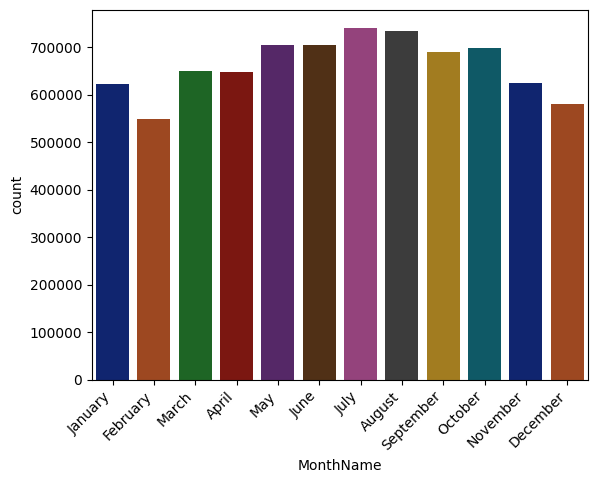

In [18]:
ax = sns.countplot(data=df, x='MonthName',palette='dark',order=month_lookup.values());
# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

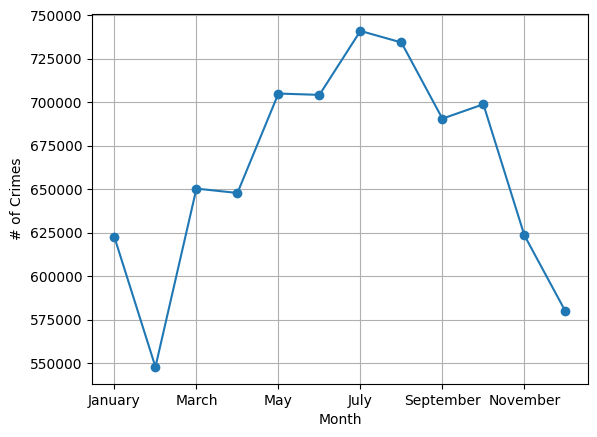

In [19]:
## save month counts
month_counts = df['MonthName'].value_counts()[month_lookup.values()]
# year_counts = df.groupby("Year").size()
ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

July has a highest number of Crimes across years and February has a lowest number of Crimes .

In [20]:

crimes_by_month = df.groupby('Primary Type')['MonthName'].value_counts().sort_index()
crimes_by_month

Primary Type       MonthName
ARSON              April         1134
                   August        1217
                   December       923
                   February       841
                   January        963
                                ...  
WEAPONS VIOLATION  March         8804
                   May          10757
                   November      8431
                   October       9869
                   September    10157
Name: MonthName, Length: 415, dtype: int64

In [21]:
plot_df = crimes_by_month.to_frame('# of Crimes').reset_index()
plot_df

,Primary Type,MonthName,# of Crimes
0,ARSON,April,1134
1,ARSON,August,1217
2,ARSON,December,923
3,ARSON,February,841
4,ARSON,January,963
...,...,...,...
410,WEAPONS VIOLATION,March,8804
411,WEAPONS VIOLATION,May,10757
412,WEAPONS VIOLATION,November,8431
413,WEAPONS VIOLATION,October,9869


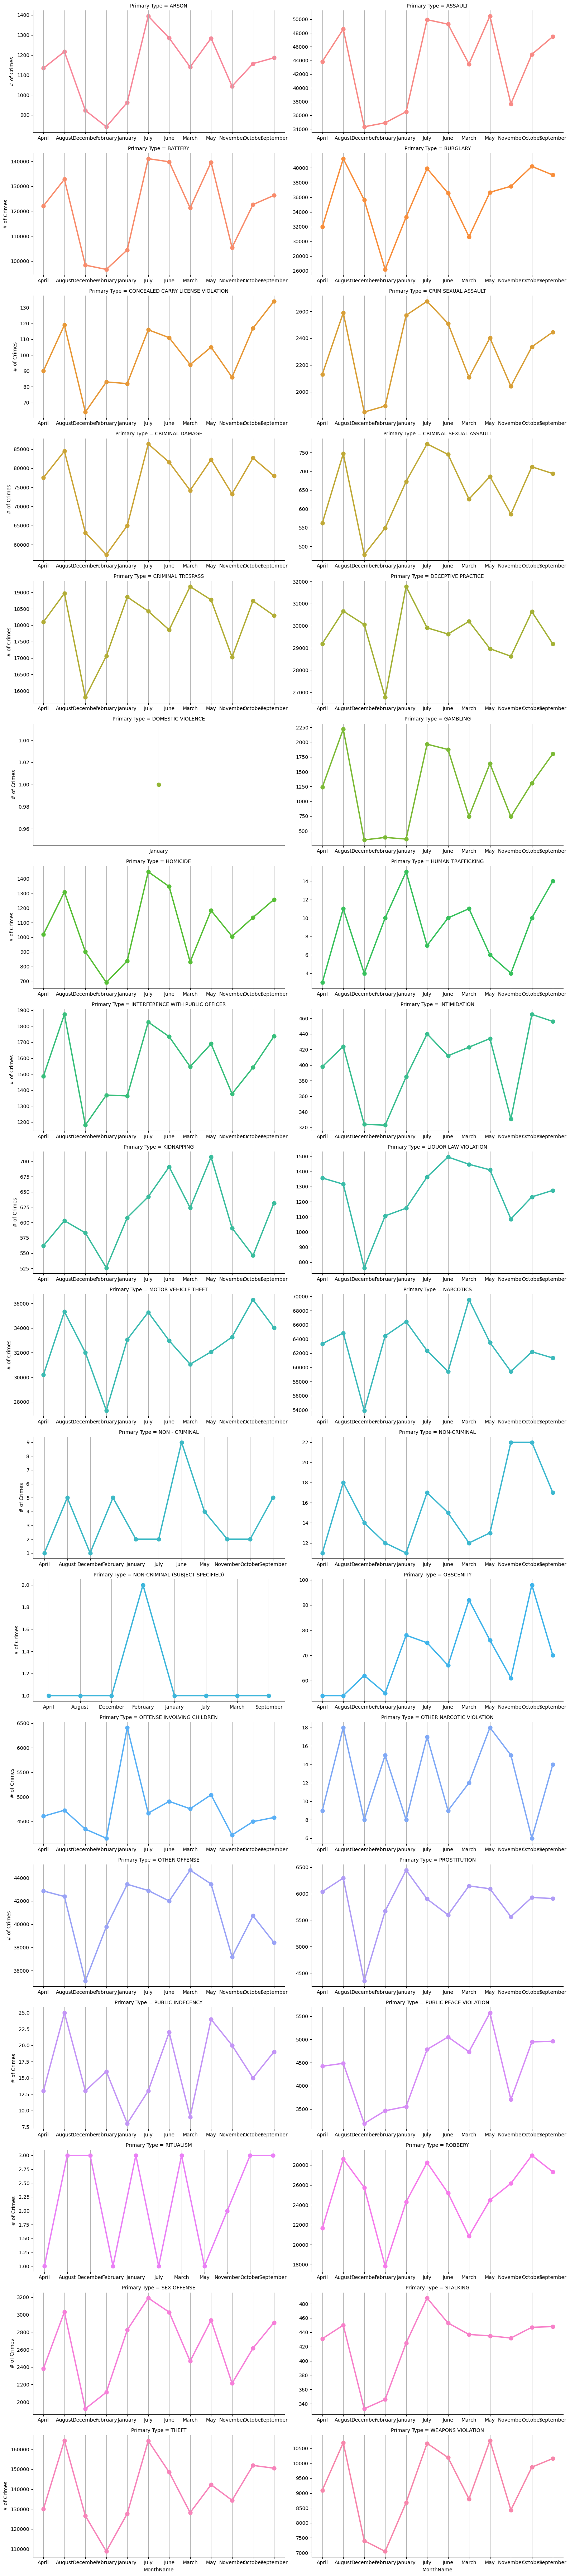

In [22]:
g  = sns.catplot(data=plot_df, x='MonthName', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

Most of Crimes follow same general pattern